* 2023-11-27
* 파이토치와 트랜스포머를 활용한 자연어처리와 컴퓨터비전 심층학습

# 3장 파이토치 기초(p.45~)

* torch.Tensor와 torch.tensor 둘 다 사용가능하지만, torch.Tensor를 사용하는 것이 권장됨
* torch.tensor는 자료형을 자동으로 할당하기 때문에, 의도치 않은 자료형으로 변환될 위험이 있음 

In [7]:
import torch

print("torch.tensor")
print(torch.tensor([1,2,3]), torch.tensor([1,2,3]).type())
print(torch.tensor([1.,2.,3.]), torch.tensor([1.,2.,3.]).type())
print("torch.Tensor")
print(torch.Tensor([1,2,3]), torch.Tensor([1,2,3]).type())
print(torch.Tensor([1., 2., 3.]), torch.Tensor([1,2,3]).type())

torch.tensor
tensor([1, 2, 3]) torch.LongTensor
tensor([1., 2., 3.]) torch.FloatTensor
torch.Tensor
tensor([1., 2., 3.]) torch.FloatTensor
tensor([1., 2., 3.]) torch.FloatTensor


* 텐서의 속성
* shape, dtype, device

In [13]:
import torch

tensor = torch.rand(1,2)
gpu_tensor = torch.rand(1,2).cuda()

print(tensor)
print(f'shape  : {tensor.shape}')
print(f'dtype  : {tensor.dtype}')
print('cpu')
print(f'device : {tensor.device}')
print('gpu')
print(f'device : {gpu_tensor.device}')

tensor([[0.6853, 0.2734]])
shape  : torch.Size([1, 2])
dtype  : torch.float32
cpu
device : cpu
gpu
device : cuda:0


* 차원변환

In [14]:
import torch

tensor = torch.rand(1,2)
print(tensor)
print(tensor.shape)

tensor = tensor.reshape(2,1)
print(tensor)
print(tensor.shape)

tensor([[0.1722, 0.6951]])
torch.Size([1, 2])
tensor([[0.1722],
        [0.6951]])
torch.Size([2, 1])


* 자료형

In [26]:
import torch

tensor = torch.rand((3,3), dtype = torch.float)
print(tensor)
print(tensor.type())

tensor([[0.8465, 0.5042, 0.7645],
        [0.3719, 0.9645, 0.8838],
        [0.0980, 0.3306, 0.1998]])
torch.FloatTensor


* 장치설정

In [29]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
cpu_tensor = torch.FloatTensor([1,2,3])
gpu_tensor = torch.cuda.FloatTensor([1,2,3])
tensor = torch.rand((1,1), device = device)
print(device)
print(cpu_tensor)
print(gpu_tensor)
print(tensor)

cuda
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([[0.8230]], device='cuda:0')


* 장치변환
*  GPU를 사용하는 텐서와 CPU를 사용하는 텐서 간의 연산은 불가능함

In [32]:
import torch

cpu_tensor = torch.FloatTensor([1,2,3])
gpu_tensor = cpu_tensor.cuda()
gpu2cpu = gpu_tensor.cpu()
cpu2gpu = cpu_tensor.to("cuda")
print('CPU :', cpu_tensor)
print('GPU :', gpu_tensor)
print('CPU :', gpu2cpu)
print('GPU :', cpu2gpu)

CPU : tensor([1., 2., 3.])
GPU : tensor([1., 2., 3.], device='cuda:0')
CPU : tensor([1., 2., 3.])
GPU : tensor([1., 2., 3.], device='cuda:0')


* 넘파이 배열 -> 토치텐서

In [35]:
import numpy as np
import torch

np_array = np.array([1,2,3], dtype = np.uint8)
print(torch.tensor(np_array))
print(torch.Tensor(np_array))
print(torch.from_numpy(np_array))

tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.uint8)


* 토치텐서 -> 넘파이 배열

In [37]:
import torch
# GPU에 tensor를 load
tensor = torch.cuda.FloatTensor([1,2,3])
# CPU에 ndarray를 load
# detach를 통해서 gpu와 연결해제
np_array = tensor.detach().cpu().numpy()
print(np_array)
print(type(np_array))

[1. 2. 3.]
<class 'numpy.ndarray'>


# 머신러닝 가설검정
* 비쌍체 t_검정
* 독립변수 X와 종속변수Y 사이에 유의미한 차이가 있는지 검정
* 변수들은 독립항등분포를 따름
* 독립적인 그룹간의 평균을 비교

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

* stats.norm.rvs()
* loc = 특정평균
* scale = 표준편차

In [45]:
man_height = stats.norm.rvs(loc = 170, scale = 10, size = 500, random_state = 1)
woman_height = stats.norm.rvs(loc = 150, scale = 10, size = 500, random_state = 1)

X = np.concatenate([man_height, woman_height])
Y = ["man"] * len(man_height) + ["woman"] * len(woman_height)

df = pd.DataFrame(list(zip(X,Y)), columns = ["X", "Y"])
df

,X,Y
0,186.243454,man
1,163.882436,man
2,164.718282,man
3,159.270314,man
4,178.654076,man
...,...,...
995,141.713720,woman
996,155.288797,woman
997,127.629135,woman
998,138.922875,woman


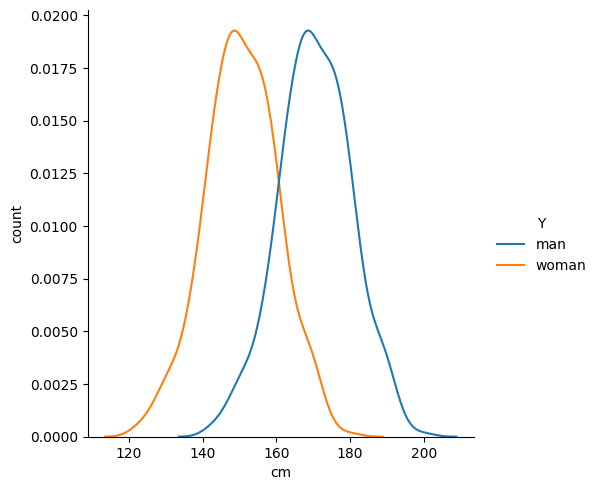

In [47]:
fig = sns.displot(data = df, x = "X", hue = "Y", kind = "kde")
fig.set_axis_labels("cm","count")
plt.show()

* 비쌍체 t-검정

In [54]:
statistics, pvalue = stats.ttest_ind(man_height, woman_height, equal_var= True)

print("statistics : {}\npvalue : {}\n* : {}\n** : {}".format(statistics, 
                                                             pvalue, 
                                                             pvalue<0.05, 
                                                             pvalue<0.001))
print("\n검정결과 : 유의 확률이 매우 작기 때문에 사람의 키가 성별을 구별하는데 매우 유의미한 변수이다!")

statistics : 31.96162891312776
pvalue : 6.2285854381989205e-155
* : True
** : True

검정결과 : 유의 확률이 매우 작기 때문에 사람의 키가 성별을 구별하는데 매우 유의미한 변수이다!


# 단순 선형회귀
* 손실함수 < 비용함수 < 목적함수
* 손실함수 : 단일 샘플의 실젯값과 예측값의 차이가 발생했을 떄 오차가 얼마인지 계산하는 함수
* 비용함수 : 전체 데이터에 대한 오차를 계산하는 함수
* 목적함수 : 함수값의 결과를 최댓값 또는 최솟값으로 최적화하는 함수

In [4]:
import numpy as np

x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)
y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

In [2]:
def  simpleregression(x, y, weight, bias, learning_rate):
    '''
    batch를 적용한 방식임. 
    '''
    print('learning_rate = {}'.format(learning_rate))
    for epoch  in range(10000):
        y_hat = weight * x + bias
        # 비용함수
        cost = ((y - y_hat)**2).mean()
        
        # 가중치
        # weight를 편미분하므로 x를 곱함
        weight = weight - learning_rate * ((y_hat - y)*x).mean()
        
        # 편향
        bias = bias - learning_rate * (y_hat - y).mean()
        '''
        print("epoch : {}, cost : {}, weight : {}, bias : {}".format(epoch,
                                                                     cost, 
                                                                     weight, 
                                                                     bias))
        '''
        if (epoch + 1) % 1000 == 0:
            print(f"Epoch : {epoch+1:4d}, Weight : {weight:.3f}, Bias : {bias:.3f}, Cost : {cost:.3f}")

In [3]:
#1 p.75 
weight = 0.0
bias = 0.0
learning_rate = 0.005

simpleregression(x = x, y = y, weight = weight, bias = bias, learning_rate = learning_rate)

learning_rate = 0.005
Epoch : 1000, Weight : 0.872, Bias : -0.290, Cost : 1.377
Epoch : 2000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 3000, Weight : 0.878, Bias : -0.422, Cost : 1.372
Epoch : 4000, Weight : 0.879, Bias : -0.432, Cost : 1.372
Epoch : 5000, Weight : 0.879, Bias : -0.435, Cost : 1.372
Epoch : 6000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 7000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 8000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.436, Cost : 1.372


In [7]:
# 내부연산 살펴보기

y_hat = weight * x + bias
print('y_hat :', y_hat)
print('y_hat.mean() :', y_hat.mean())

y_hat : [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
y_hat.mean() : 0.0


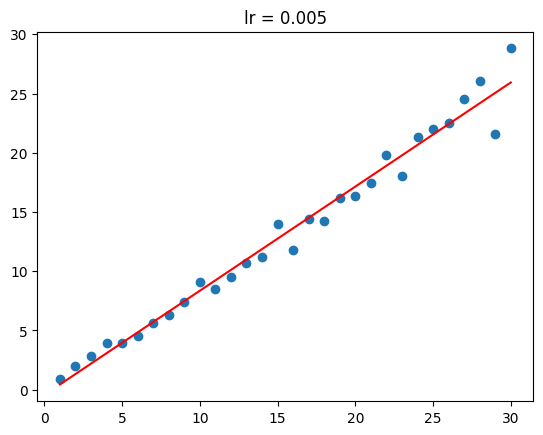

In [15]:
import matplotlib.pyplot as plt

def plot_maker(x,y,weight,bias,lr):
    plt.scatter(x,y)
    y_hat = weight * x - bias
    plt.plot(x, y_hat, color = 'red')
    plt.title(f'lr = {lr}')
    plt.show()
    

plot_maker(x = x, y = y, weight = 0.879, bias = 0.436, lr = 0.005)

In [102]:
#2 p.77(1)
weight = 0.0
bias = 0.0
learning_rate = 0.001

simpleregression(x = x, y = y, weight = weight, bias = bias, learning_rate = learning_rate)

learning_rate = 0.001
Epoch : 1000, Weight : 0.860, Bias : -0.059, Cost : 1.406
Epoch : 2000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch : 3000, Weight : 0.867, Bias : -0.201, Cost : 1.385
Epoch : 4000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 5000, Weight : 0.872, Bias : -0.290, Cost : 1.377
Epoch : 6000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 7000, Weight : 0.874, Bias : -0.345, Cost : 1.374
Epoch : 8000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 9000, Weight : 0.876, Bias : -0.379, Cost : 1.373
Epoch : 10000, Weight : 0.877, Bias : -0.391, Cost : 1.373


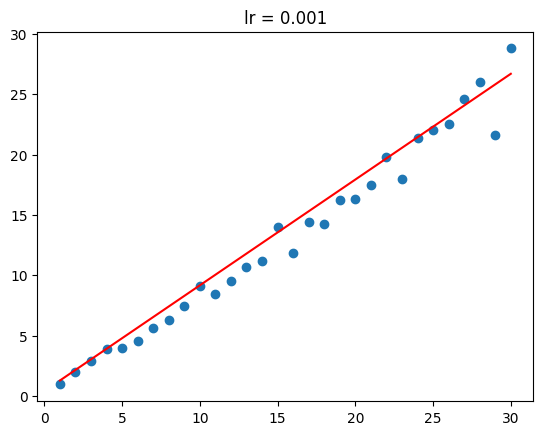

In [17]:
plot_maker(x = x, y = y, weight = 0.877, bias = -0.391, lr = 0.001)

In [103]:
#2 p.77(2)
weight = 0.0
bias = 0.0
learning_rate = 0.006

simpleregression(x = x, y = y, weight = weight, bias = bias, learning_rate = learning_rate)

learning_rate = 0.006
Epoch : 1000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 2000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch : 3000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch : 4000, Weight : 0.879, Bias : -0.434, Cost : 1.372
Epoch : 5000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 6000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 7000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 8000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.436, Cost : 1.372


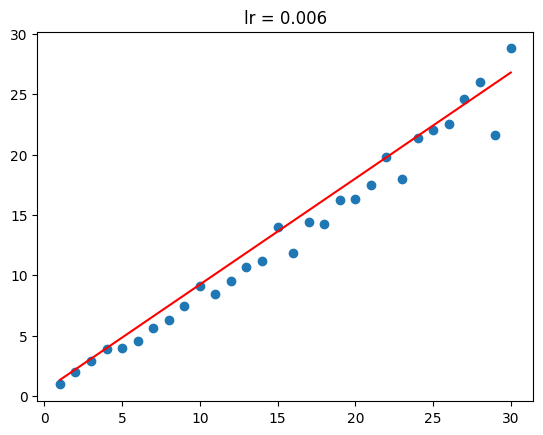

In [19]:
plot_maker(x = x, y = y, weight = 0.879, bias = -0.436, lr = 0.006)

* 단순선형회귀 파이토치

In [20]:
import torch
from torch import optim

In [22]:
x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [23]:
# autograd 자동미분기능(역전파)

weight = torch.zeros(1, requires_grad = True)
bias = torch.zeros(1, requires_grad = True)
learning_rate = 0.001

print('weight : {}\nbias : {}'.format(weight, bias))

weight : tensor([0.], requires_grad=True)
bias : tensor([0.], requires_grad=True)


In [24]:
# 옵티마이저 설정
# torch.optim
optimizer = optim.SGD([weight, bias], lr = learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [112]:
for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y)**2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost:{cost:.3f}")

Epoch: 1000, Weight : 0.864, Bias : -0.138, Cost:1.393
Epoch: 2000, Weight : 0.870, Bias : -0.251, Cost:1.380
Epoch: 3000, Weight : 0.873, Bias : -0.321, Cost:1.375
Epoch: 4000, Weight : 0.875, Bias : -0.364, Cost:1.373
Epoch: 5000, Weight : 0.877, Bias : -0.391, Cost:1.373
Epoch: 6000, Weight : 0.878, Bias : -0.408, Cost:1.372
Epoch: 7000, Weight : 0.878, Bias : -0.419, Cost:1.372
Epoch: 8000, Weight : 0.878, Bias : -0.425, Cost:1.372
Epoch: 9000, Weight : 0.879, Bias : -0.429, Cost:1.372
Epoch: 10000, Weight : 0.879, Bias : -0.432, Cost:1.372


* zero_grad 사용하는 이유

In [53]:
temp = torch.tensor(2.0, requires_grad = True)

for i in range(5):
    z = 2*temp
    z.backward()
    print(f'역전파 {i+1}번 grad:',temp.grad)

역전파 1번 grad: tensor(2.)
역전파 2번 grad: tensor(4.)
역전파 3번 grad: tensor(6.)
역전파 4번 grad: tensor(8.)
역전파 5번 grad: tensor(10.)


* gradient들은 1에포크에서 역할을 다한 것이므로 초기화 해주어야함

* 자세히 알아보기

In [114]:
import torch
from torch import optim


x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

optimizer = optim.SGD([weight, bias], lr=learning_rate)

for epoch in range(10000):
    hytheposis = weight * x + bias
    cost = torch.mean((hytheposis - y) ** 2)
    
    print(f"------------ Epoch : {epoch+1:4d} ------------")
    print(f"Step [1] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    # 기울기 초기화
    # 기울기가 weight = x가 아닌 weight += x로 저장되므로 0으로 초기화해주어야함!!!!!
    optimizer.zero_grad()
    print(f"Step [2] : Gradient : {weight.grad}, Weight : {weight.item():.5f}" )

    # 역전파
    cost.backward()
    print(f"Step [3] : Gradient : {weight.grad}, Weight : {weight.item():.5f}" )

    # 확률적 경사하강법 수행
    optimizer.step()
    print(f"Step [4] : Gradient : {weight.grad}, Weight : {weight.item():.5f}" )
    
    if epoch == 3:
        break

------------ Epoch :    1 ------------
Step [1] : Gradient : None, Weight : 0.00000
Step [2] : Gradient : None, Weight : 0.00000
Step [3] : Gradient : tensor([-540.4854]), Weight : 0.00000
Step [4] : Gradient : tensor([-540.4854]), Weight : 0.54049
------------ Epoch :    2 ------------
Step [1] : Gradient : tensor([-540.4854]), Weight : 0.54049
Step [2] : Gradient : None, Weight : 0.54049
Step [3] : Gradient : tensor([-198.9818]), Weight : 0.54049
Step [4] : Gradient : tensor([-198.9818]), Weight : 0.73947
------------ Epoch :    3 ------------
Step [1] : Gradient : tensor([-198.9818]), Weight : 0.73947
Step [2] : Gradient : None, Weight : 0.73947
Step [3] : Gradient : tensor([-73.2604]), Weight : 0.73947
Step [4] : Gradient : tensor([-73.2604]), Weight : 0.81273
------------ Epoch :    4 ------------
Step [1] : Gradient : tensor([-73.2604]), Weight : 0.81273
Step [2] : Gradient : None, Weight : 0.81273
Step [3] : Gradient : tensor([-26.9772]), Weight : 0.81273
Step [4] : Gradient : t

# 파이토치 가중치 갱신
* zero_grad : 옵티마이저 기울기 초기화
* cost.backward :  역전파
* optimizer : 기울기 갱신

# 신경망 패키지(torch.nn)

In [54]:
# 선형 레이어 변수
f'''
layer = torch.nn.linear(
  in_feature,
  out_feature,
  bias = True,
  device = None,
  dtype = None
  )
'''

'\nlayer = torch.nn.linear(\n  in_feature,\n  out_feature,\n  bias = True,\n  device = None,\n  dtype = None\n  )\n'

In [1]:
import torch
from torch import nn
from torch import optim

x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [3]:
# 모델
model = nn.Linear(1,1)
# 손실함수
criterion = nn.MSELoss()
# 옵티마이저
optimizer = optim.SGD(model.parameters(), lr = 0.001)
# optim.SGD([weight, bias], learning_rate = 0.001)

In [121]:
for epoch in range(10000):
    output = model(x)
    cost = criterion(output, y)
    
    # [1] 옵티마이저값 초기화
    optimizer.zero_grad()
    # [2] 손실함수 역전파 수행
    cost.backward()
    # [3] 가중치 갱신
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.8330]], requires_grad=True), Parameter containing:
tensor([0.4959], requires_grad=True)], Cost : 1.579
Epoch : 2000, Model : [Parameter containing:
tensor([[0.8504]], requires_grad=True), Parameter containing:
tensor([0.1439], requires_grad=True)], Cost : 1.452
Epoch : 3000, Model : [Parameter containing:
tensor([[0.8611]], requires_grad=True), Parameter containing:
tensor([-0.0751], requires_grad=True)], Cost : 1.403
Epoch : 4000, Model : [Parameter containing:
tensor([[0.8678]], requires_grad=True), Parameter containing:
tensor([-0.2114], requires_grad=True)], Cost : 1.384
Epoch : 5000, Model : [Parameter containing:
tensor([[0.8720]], requires_grad=True), Parameter containing:
tensor([-0.2962], requires_grad=True)], Cost : 1.377
Epoch : 6000, Model : [Parameter containing:
tensor([[0.8746]], requires_grad=True), Parameter containing:
tensor([-0.3490], requires_grad=True)], Cost : 1.374
Epoch : 7000, Model : [Parameter containin

# 데이터세트와 데이터로더

* 데이터세트

In [122]:
class Dataset:
    # 초기화 메서드
    # 학습에 사용될 데이터선언 + 학습에 필요한 형태로 변형
    def __init__(self, data, *arg, **kwargs):
        self.data = data

    # 길이 반환 매서드
    # 학습에 사용되는 전체 데이터세트의 개수를 반환
    def __len__(self):
        return self.data[0].size(0)

    # 호출메서드
    # 학습을 진행할 떄, 하나의 행을 불러오는 과정과 비슷함
    def __getitem__(self, index):
        return tuple(data[index] for data in data.tensors)

* 데이터로더
* 데이터세트에 저장된 데이터를 어떠한 방식으로 불러와 활용할지 정의
* batch_size, shuffle, num_workers 등의 기능 제공

# 다중선형회귀

* x1, x2, y1, y2
* y1 = w1x1 + w2x2 + b1
* y2 = w3x1 + w4x2 + b2

In [144]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

In [145]:
train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

In [146]:
train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size = 2, shuffle = True, drop_last = True)
# drop_last :  배치크기에 맞지않는 데이터는 제거

In [147]:
for  batch in train_dataloader:
    x, y = batch
    print('---------------')
    print('x : {}'.format(x))
    print('y : {}'.format(y))
    print('---------------')

---------------
x : tensor([[6., 7.],
        [5., 6.]])
y : tensor([[4.6000, 8.0000],
        [3.7000, 6.7000]])
---------------
---------------
x : tensor([[4., 5.],
        [3., 4.]])
y : tensor([[2.8000, 5.4000],
        [1.9000, 4.1000]])
---------------
---------------
x : tensor([[1., 2.],
        [2., 3.]])
y : tensor([[0.1000, 1.5000],
        [1.0000, 2.8000]])
---------------


In [148]:
def multi_regression(data = train_dataloader, 
                     model = model, 
                     criterion = criterion,
                     optimizer = optimizer):
    for epoch in range(20000):
        # epoch마다 오차 다시 계산
        cost = 0.0
        
        for batch in train_dataloader:
            x, y = batch
            output = model(x)
            
            loss = criterion(output, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            # 배치 단위이므로 오차에 손실을 누적해서 더함
            cost += loss
        cost = cost / len(train_dataloader)
        
        if (epoch + 1) % 1000 == 0:
            print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

In [149]:
model = nn.Linear(2,2, bias = True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)
multi_regression(data = train_dataloader, 
                     model = model, 
                     criterion = criterion,
                     optimizer = optimizer)

Epoch : 1000, Model : [Parameter containing:
tensor([[0.3772, 0.2822],
        [0.5035, 0.7862]], requires_grad=True), Parameter containing:
tensor([-0.0714, -0.5432], requires_grad=True)], Cost : 0.099
Epoch : 2000, Model : [Parameter containing:
tensor([[0.6212, 0.1563],
        [0.5139, 0.7808]], requires_grad=True), Parameter containing:
tensor([-0.4412, -0.5589], requires_grad=True)], Cost : 0.026
Epoch : 3000, Model : [Parameter containing:
tensor([[0.7455, 0.0922],
        [0.5192, 0.7781]], requires_grad=True), Parameter containing:
tensor([-0.6297, -0.5669], requires_grad=True)], Cost : 0.007
Epoch : 4000, Model : [Parameter containing:
tensor([[0.8088, 0.0594],
        [0.5219, 0.7767]], requires_grad=True), Parameter containing:
tensor([-0.7257, -0.5710], requires_grad=True)], Cost : 0.002
Epoch : 5000, Model : [Parameter containing:
tensor([[0.8411, 0.0428],
        [0.5233, 0.7760]], requires_grad=True), Parameter containing:
tensor([-0.7746, -0.5731], requires_grad=True)]

# 모델/데이터세트 분리

* 모델 구현
* 모듈클래스활용
* 모듈클래스를 상속받아 임의의 서브클래스를 생성하여 사용

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_features = 1,out_features = 20, kernel_size = 5)
        self.conv2 = nn.Conv2d(20,20,5)
    
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x
'''
tensor의 auto_grad에서 모댈의 매개변수를 역으로 
전파해 자동으로 기울기 또는 변화도를 계산해줌
'''

# 비선형회귀

In [150]:
import pandas as pd
pd.read_csv('./non_linear.csv')

,x,y
0,-10.0,327.79
1,-9.9,321.39
2,-9.8,314.48
3,-9.7,308.51
4,-9.6,302.86
...,...,...
195,9.5,263.80
196,9.6,269.85
197,9.7,275.31
198,9.8,281.40


In [151]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [159]:
# 사용자 정의 데이터세트
class CustomDataset(Dataset):
    '''
    데이터세트를 상속받아 커스텀 데이터세트를 생성 
    '''
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:, 0].values
        self.y = df.iloc[:, 1].values
        self.length = len(df)
    
    def __getitem__(self, index):
        '''
        y = w1 * (x**2) + w2 * x + bias
        x = [x**2, x]형태
        '''
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y
    
    def __len__(self):
        return self.length

In [155]:
# 사용자 정의 모델
class CustomModel(nn.Module):
    '''
    선형변환함수를 이용한 모델
    '''
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2,1)
    
    def forward(self, x):
        x = self.layer(x)
        return x

In [173]:
train_dataset = CustomDataset('./non_linear.csv')
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True, drop_last = True)

'''
32 batch
'''
for batch, i in zip(train_loader, range(6)):
    x, y = batch
    print(f'----- batch : {i+1} ------')
    print(f'x : {x}')
    print(f'y : {y}')

----- batch : 1 ------
x : tensor([[ 2.8090e+01, -5.3000e+00],
        [ 2.9160e+01,  5.4000e+00],
        [ 9.0000e-02,  3.0000e-01],
        [ 1.5210e+01,  3.9000e+00],
        [ 3.6000e+01, -6.0000e+00],
        [ 3.6000e+01,  6.0000e+00],
        [ 8.4640e+01,  9.2000e+00],
        [ 5.7600e+00, -2.4000e+00],
        [ 6.0840e+01, -7.8000e+00],
        [ 2.5000e-01,  5.0000e-01],
        [ 7.9210e+01,  8.9000e+00],
        [ 9.2160e+01, -9.6000e+00],
        [ 2.6010e+01, -5.1000e+00],
        [ 7.2250e+01,  8.5000e+00],
        [ 6.4000e-01,  8.0000e-01],
        [ 8.4100e+00, -2.9000e+00],
        [ 4.4890e+01,  6.7000e+00],
        [ 4.3560e+01, -6.6000e+00],
        [ 5.7760e+01, -7.6000e+00],
        [ 5.7760e+01,  7.6000e+00],
        [ 3.1360e+01, -5.6000e+00],
        [ 1.4400e+00, -1.2000e+00],
        [ 5.9290e+01, -7.7000e+00],
        [ 2.4010e+01, -4.9000e+00],
        [ 1.0890e+01, -3.3000e+00],
        [ 4.2250e+01, -6.5000e+00],
        [ 1.6900e+00,  1.3000e+00],
 

In [174]:
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True, drop_last = True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(),lr = 0.0001)

for epoch in range(10000):
    cost = 0.0
    
    for batch in train_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        output = model(x)
        loss = criterion(output,y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss
    cost = cost/len(train_dataloader)
    
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}')

Epoch : 1000, Model : [Parameter containing:
tensor([[ 3.1029, -1.6867]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3214], device='cuda:0', requires_grad=True)], Cost : 0.097
Epoch : 2000, Model : [Parameter containing:
tensor([[ 3.1017, -1.6885]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3923], device='cuda:0', requires_grad=True)], Cost : 0.081
Epoch : 3000, Model : [Parameter containing:
tensor([[ 3.1008, -1.6899]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4466], device='cuda:0', requires_grad=True)], Cost : 0.071
Epoch : 4000, Model : [Parameter containing:
tensor([[ 3.1001, -1.6909]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4882], device='cuda:0', requires_grad=True)], Cost : 0.065
Epoch : 5000, Model : [Parameter containing:
tensor([[ 3.0995, -1.6917]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.5200], device='cuda:0', requires_grad=True)]

<y_hat = 3.0982*(x**2) - 1.6937*x + 0.5967>

* 모델 평가

In [175]:
# no_grad로 기울기계산을 비활성화해야 메모리 사용량을 줄임

with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1**2, 1],
            [5**2, 5],
            [11**2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

tensor([[  2.0012],
        [ 69.5837],
        [356.8502]], device='cuda:0')


* 모델 저장

In [176]:
torch.save(
    model,
    './first_model.pt'
)

In [177]:
torch.save(
    model.state_dict(),
    './first_model_state_dict.pt'
)

# 데이터세트 분리

In [194]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader, random_split

In [195]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:,0].values
        self.y = df.iloc[:,1].values
        self.length = len(df)
    
    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index]**2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x,y
    
    def __len__(self):
        return self.length

In [196]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2,1)
    
    def forward(self, x):
        x = self.layer(x)
        return x

torch.utils.random_split(dataset, length, generator)

In [198]:
dataset = CustomDataset('./non_linear.csv')
dataset_size = len(dataset)
train_size =  int(dataset_size * 0.8)
val_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

print(f"Training Data Size : {len(train_dataset)}")
print(f"Val Data Size : {len(val_dataset)}")
print(f"Test Data Size : {len(test_dataset)}")

train_dataloader = DataLoader(train_dataset, batch_size = 16, shuffle = True, drop_last = True)
val_dataloader = DataLoader(val_dataset, batch_size = 4, shuffle = True, drop_last = True)
test_dataloader =  DataLoader(test_dataset, batch_size = 4, shuffle = True, drop_last = True)

Training Data Size : 160
Val Data Size : 20
Test Data Size : 20


In [199]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.0001)

In [200]:
for epoch in range(10000):
    cost = 0.0
    for x,y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
       
        output = model(x)
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss
    cost = cost/len(train_dataloader)
    
    if (epoch+1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[ 3.1019, -1.7045]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3837], device='cuda:0', requires_grad=True)], Cost : 0.084
Epoch : 2000, Model : [Parameter containing:
tensor([[ 3.1008, -1.7047]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4603], device='cuda:0', requires_grad=True)], Cost : 0.078
Epoch : 3000, Model : [Parameter containing:
tensor([[ 3.0999, -1.7045]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4905], device='cuda:0', requires_grad=True)], Cost : 0.076
Epoch : 4000, Model : [Parameter containing:
tensor([[ 3.0994, -1.7048]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.5025], device='cuda:0', requires_grad=True)], Cost : 0.076
Epoch : 5000, Model : [Parameter containing:
tensor([[ 3.0996, -1.7048]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.5073], device='cuda:0', requires_grad=True)]

y = 3.1000*(x**2) - 1.7049*x + 0.5104

In [201]:
with torch.no_grad():
    model.eval()
    for x,y in val_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        outputs = model(x)
        print(f'X : {x}')
        print(f'Y : {y}')
        print(f'Outputs : {outputs}')
        print('---------------------')

X : tensor([[44.8900, -6.7000],
        [ 9.6100,  3.1000],
        [21.1600,  4.6000],
        [ 0.0900, -0.3000]], device='cuda:0')
Y : tensor([[151.2400],
        [ 25.0400],
        [ 58.1100],
        [  1.4900]], device='cuda:0')
Outputs : tensor([[151.0943],
        [ 25.0166],
        [ 58.2648],
        [  1.3008]], device='cuda:0')
---------------------
X : tensor([[ 5.0410e+01,  7.1000e+00],
        [ 5.3290e+01, -7.3000e+00],
        [ 4.0000e-02, -2.0000e-01],
        [ 5.1840e+01, -7.2000e+00]], device='cuda:0')
Y : tensor([[144.2400],
        [177.7300],
        [  1.0400],
        [173.7300]], device='cuda:0')
Outputs : tensor([[144.6788],
        [178.1576],
        [  0.9753],
        [173.4920]], device='cuda:0')
---------------------
X : tensor([[43.5600, -6.6000],
        [42.2500,  6.5000],
        [10.8900, -3.3000],
        [ 8.4100,  2.9000]], device='cuda:0')
Y : tensor([[146.3200],
        [119.9600],
        [ 39.7100],
        [ 21.1800]], device='cuda:0')


# 모델 호출하기

* torch.save()
* torch.load(path = '__경로__', map_location = '__장치__')

In [202]:
import torch
from torch import nn

# 이전에 저장했던 모델의 구조
# 저장한 모델을 호출하기 위헤서는 비슷한 구조의 모델클래스가 정의 되어있어야함
# 없다면 오류발생

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2,1)
    
    def forward(self,x):
        x = self.layer(x)
        return x

In [204]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = torch.load('./first_model.pt', map_location = device)
print(model)

CustomModel(
  (layer): Linear(in_features=2, out_features=1, bias=True)
)


In [205]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1**2, 1],
            [5**2, 5],
            [11**2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

tensor([[  2.0012],
        [ 69.5837],
        [356.8502]], device='cuda:0')


* 모델구조확인
* 모델 전체 파일은 가지고 있으나 모델 구조를 알 수 없는 경우에는 모델 구조를 출력해서 확인할 수 있음 

In [208]:
import torch
from torch import nn

class CustomModel(nn.Module):
    pass

device = "cuda" if torch.cuda.is_available() else "cpu"
model = torch.load('./first_model.pt', map_location = device)
print(model)

CustomModel(
  (layer): Linear(in_features=2, out_features=1, bias=True)
)


* 모델 상태 불러오기

In [209]:
import torch
from torch import nn

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2,1)
    
    def forward(self, x):
        x = self.layer(x)
        return x

In [217]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)

model_state_dict = torch.load('./first_model_state_dict.pt', map_location = device)
print(model_state_dict)

model.load_state_dict(model_state_dict)
print(model)

with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1**2, 1],
            [5**2, 5],
            [11**2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

OrderedDict([('layer.weight', tensor([[ 3.0982, -1.6937]], device='cuda:0')), ('layer.bias', tensor([0.5967], device='cuda:0'))])
CustomModel(
  (layer): Linear(in_features=2, out_features=1, bias=True)
)
tensor([[  2.0012],
        [ 69.5837],
        [356.8502]], device='cuda:0')


# CheckPoint save

In [225]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:,0].values
        self.y = df.iloc[:,1].values
        self.length = len(df)
        
    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index]**2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y
   
    def __len__(self):
        return self.length

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2,1)
    
    def forward(self,x):
        x = self.layer(x)
        return x

train_dataset = CustomDataset('./non_linear.csv')
train_dataloader = DataLoader(train_dataset, batch_size = 128, shuffle = True, drop_last = True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.0001)

In [227]:
checkpoint = 1  
for epoch in range(10000):
    cost = 0.0
    for x,y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        output = model(x)
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cost += loss
    cost = cost / len(train_dataloader)
    
    if (epoch + 1) % 1000 == 0:
        torch.save(
            {
                "model" : "CustomModel",
                "epoch" : epoch,
                "model_state_dict" : model.state_dict(),
                "optimizer_state_dict" : optimizer.state_dict(),
                "cost" : cost,
                "description" : f"CustomModel 체크포인트 - {checkpoint}",
            },
            f"./first_model_checkpoint/checkpoint-{checkpoint}.pt"
        )
        checkpoint += 1

In [228]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1**2, 1],
            [5**2, 5],
            [11**2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

tensor([[  1.7925],
        [ 69.4199],
        [356.9622]], device='cuda:0')


In [9]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
model = torch.load('./first_model_checkpoint/checkpoint-3.pt',map_location = device)
print(model)

{'model': 'CustomModel', 'epoch': 2999, 'model_state_dict': OrderedDict([('layer.weight', tensor([[ 3.1034, -1.7033]], device='cuda:0')), ('layer.bias', tensor([0.3080], device='cuda:0'))]), 'optimizer_state_dict': {'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}}, 'param_groups': [{'lr': 0.0001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}, 'cost': tensor(0.0840, device='cuda:0', requires_grad=True), 'description': 'CustomModel 체크포인트 - 3'}


# Checkpoint load

In [230]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:,0].values
        self.y = df.iloc[:,1].values
        self.length = len(df)
    
    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index]**2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x,y
    
    def __len__(self):
        return self.length

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2,1)
    
    def forward(self, x):
        x = self.layer(x)
        return x


train_dataset = CustomDataset('./non_linear.csv')
train_dataloader = DataLoader(train_dataset, batch_size = 128, shuffle = True, drop_last = True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimize = optim.SGD(model.parameters(),lr = 0.0001)

In [233]:
checkpoint = torch.load('./first_model_checkpoint/checkpoint-6.pt')
checkpoint

{'model': 'CustomModel',
 'epoch': 5999,
 'model_state_dict': OrderedDict([('layer.weight',
               tensor([[ 3.1024, -1.7031]], device='cuda:0')),
              ('layer.bias', tensor([0.3516], device='cuda:0'))]),
 'optimizer_state_dict': {'state': {0: {'momentum_buffer': None},
   1: {'momentum_buffer': None}},
  'param_groups': [{'lr': 0.0001,
    'momentum': 0,
    'dampening': 0,
    'weight_decay': 0,
    'nesterov': False,
    'maximize': False,
    'foreach': None,
    'differentiable': False,
    'params': [0, 1]}]},
 'cost': tensor(0.0780, device='cuda:0', requires_grad=True),
 'description': 'CustomModel 체크포인트 - 6'}

In [234]:
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
checkpoint_epoch = checkpoint['epoch']
checkpoint_description = checkpoint['description']
print(checkpoint_description)

CustomModel 체크포인트 - 6


In [235]:
for epoch in range(checkpoint_epoch + 1, 10000):
    cost = 0.0
    for x,y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
    
        output = model(x)
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss
        if (epoch + 1) % 1000 == 0:
            print(f'Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}')

Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1024, -1.7031]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3516], device='cuda:0', requires_grad=True)], Cost : 0.080
Epoch : 8000, Model : [Parameter containing:
tensor([[ 3.1024, -1.7031]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3516], device='cuda:0', requires_grad=True)], Cost : 0.090
Epoch : 9000, Model : [Parameter containing:
tensor([[ 3.1024, -1.7031]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3516], device='cuda:0', requires_grad=True)], Cost : 0.082
Epoch : 10000, Model : [Parameter containing:
tensor([[ 3.1024, -1.7031]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3516], device='cuda:0', requires_grad=True)], Cost : 0.083


# 이진분류

In [236]:
import pandas as pd
pd.read_csv('./binary.csv')

,x,y,z,pass
0,86,22,1,False
1,81,75,91,True
2,54,85,78,True
3,5,58,4,False
4,53,93,100,True
...,...,...,...,...
995,38,30,83,False
996,73,78,85,True
997,52,50,29,False
998,60,66,16,False


In [237]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader, random_split

In [247]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:,0].values 
        self.x2 = df.iloc[:,1].values
        self.x3 = df.iloc[:,2].values
        self.y = df.iloc[:,3].values
        self.length = len(df)
    
    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index], self.x3[index]])
        # BCELoss를 사용하므로
        y = torch.FloatTensor([int(self.y[index])])
        return x,y
    
    def __len__(self):
        return self.length

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(3,1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.layer(x)
        return x

In [248]:
dataset = CustomDataset('./binary.csv')
dataset_size = len(dataset)
train_size = int(dataset_size * 0.8)
val_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], torch.manual_seed(4))
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True, drop_last = True)
val_dataloader = DataLoader(val_dataset, batch_size = 4, shuffle = True, drop_last = True)
test_dataloader = DataLoader(test_dataset, batch_size = 4, shuffle = True, drop_last = True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.0001)

In [249]:
for epoch in range(10000):
    cost = 0.0
    for x,y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        output = model(x)
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss
    cost = cost / len(train_dataloader)
    
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}')

Epoch : 1000, Model : [Parameter containing:
tensor([[ 0.0028, -0.0006,  0.0036]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.0949], device='cuda:0', requires_grad=True)], Cost : 0.680
Epoch : 2000, Model : [Parameter containing:
tensor([[0.0034, 0.0005, 0.0041]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.0346], device='cuda:0', requires_grad=True)], Cost : 0.666
Epoch : 3000, Model : [Parameter containing:
tensor([[0.0045, 0.0017, 0.0051]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.1609], device='cuda:0', requires_grad=True)], Cost : 0.652
Epoch : 4000, Model : [Parameter containing:
tensor([[0.0052, 0.0017, 0.0053]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.2843], device='cuda:0', requires_grad=True)], Cost : 0.636
Epoch : 5000, Model : [Parameter containing:
tensor([[0.0059, 0.0036, 0.0064]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.4046], 

In [251]:
with torch.no_grad():
    model.eval()
    for x,y in val_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        outputs = model(x)

        print(x)
        print(outputs)
        print(outputs >= torch.FloatTensor([0.5]).to(device))
        print('-----------------------------')

tensor([[16., 35., 65.],
        [53., 70., 80.],
        [ 0., 43., 12.],
        [84., 74., 71.]], device='cuda:0')
tensor([[0.5122],
        [0.6827],
        [0.3664],
        [0.7276]], device='cuda:0')
tensor([[ True],
        [ True],
        [False],
        [ True]], device='cuda:0')
-----------------------------
tensor([[83., 60., 59.],
        [ 2., 51., 94.],
        [18.,  0., 40.],
        [ 2., 17., 28.]], device='cuda:0')
tensor([[0.6813],
        [0.5783],
        [0.3967],
        [0.3640]], device='cuda:0')
tensor([[ True],
        [ True],
        [False],
        [False]], device='cuda:0')
-----------------------------
tensor([[57., 43., 89.],
        [80., 60., 86.],
        [87., 83., 85.],
        [94., 73., 49.]], device='cuda:0')
tensor([[0.6681],
        [0.7298],
        [0.7697],
        [0.7010]], device='cuda:0')
tensor([[True],
        [True],
        [True],
        [True]], device='cuda:0')
-----------------------------
tensor([[ 51., 100.,   4.],
    

# 모델 구조와 초깃값 

In [12]:
import torch
from torch import nn, optim

In [20]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Sequential(
            nn.Linear(2,2),
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
        )
        
        self.layer1[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[0.4352, 0.3545],
                          [0.1951, 0.4835]])
        )
        self.layer1[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.1419, 0.0439])
        )
        self.layer2[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[-0.1725, 0.1129]])
        )
        self.layer2[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.3043])
        )
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.001)
print(model)

CustomModel(
  (layer1): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (layer2): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


# 책외 내용 -> 모델 구조확인하기
* from torchinfo import summary
* from torchsummary import summary

In [24]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
CustomModel                              --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       6
│    └─Sigmoid: 2-2                      --
├─Sequential: 1-2                        --
│    └─Linear: 2-3                       3
│    └─Sigmoid: 2-4                      --
Total params: 9
Trainable params: 9
Non-trainable params: 0

In [27]:
from torchsummary import summary
summary(model, (2,2), batch_size = 32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [32, 2, 2]               6
           Sigmoid-2                 [32, 2, 2]               0
            Linear-3                 [32, 2, 1]               3
           Sigmoid-4                 [32, 2, 1]               0
Total params: 9
Trainable params: 9
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# 단층퍼셉트론
* Threshold Logic Unit

In [33]:
import torch
import pandas as pd
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

data = pd.read_csv('./perceptron.csv')
data

,x1,x2,y
0,True,True,False
1,True,False,True
2,True,False,True
3,True,True,False
4,True,True,False
...,...,...,...
995,True,True,False
996,True,True,False
997,False,True,True
998,False,False,False


In [34]:
len(data)

1000

In [29]:
# 데이터셋 호출
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:,0].values
        self.x2 = df.iloc[:,1].values
        self.y = df.iloc[:,2].values
        self.length = len(df)
    
    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y
    
    def __len__(self):
        return self.length

# 단층퍼셉트론
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.layer1(x)
        return x

In [37]:
# 데이터로더
train_dataset = CustomDataset('./perceptron.csv')
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True, drop_last = True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = Perceptron().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [38]:
print(len(train_dataloader))
print(len(train_dataloader) * 64)

15
960


In [39]:
checkpoint = 1

for epoch in range(10000):
    cost = 0.0
    for x,y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        output = model(x)
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cost += loss
    cost = cost / len(train_dataloader)
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")
        torch.save(
            {
                "model" : "CustomModel",
                "epoch" : epoch,
                "model_state_dict" : model.state_dict(),
                "optimizer_state_dict" : optimizer.state_dict(),
                "cost" : cost,
                "description" : f"CustomModel 체크포인트 - {checkpoint}",
            },
            f"./perceptron/perceptron_checkpoint-{checkpoint}.pt"
        )
        checkpoint += 1

C:\Users\user\AppData\Local\Temp\ipykernel_2408\4126486810.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
C:\Users\user\AppData\Local\Temp\ipykernel_2408\4126486810.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.693
Epoch : 2000, Cost : 0.692
Epoch : 3000, Cost : 0.691
Epoch : 4000, Cost : 0.692
Epoch : 5000, Cost : 0.692
Epoch : 6000, Cost : 0.692
Epoch : 7000, Cost : 0.692
Epoch : 8000, Cost : 0.692
Epoch : 9000, Cost : 0.692
Epoch : 10000, Cost : 0.692


In [59]:
from torchinfo import summary

checkpoint = torch.load('./perceptron/perceptron_checkpoint-4.pt')
print(checkpoint)
model = Perceptron().to(device)
model.load_state_dict(checkpoint['model_state_dict'])
summary(model)

{'model': 'CustomModel', 'epoch': 3999, 'model_state_dict': OrderedDict([('layer1.0.weight', tensor([[0.1445, 0.1276]], device='cuda:0')), ('layer1.0.bias', tensor([-0.1308], device='cuda:0'))]), 'optimizer_state_dict': {'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}, 'cost': tensor(0.6921, device='cuda:0', requires_grad=True), 'description': 'CustomModel 체크포인트 - 4'}


Layer (type:depth-idx)                   Param #
Perceptron                               --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       3
│    └─Sigmoid: 2-2                      --
Total params: 3
Trainable params: 3
Non-trainable params: 0

In [72]:
from torchsummary import summary
summary(model, (1,2), 64)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [64, 1, 1]               3
           Sigmoid-2                 [64, 1, 1]               0
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


* XOR적용

In [73]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor([
        [0,0],
        [0,1],
        [1,0],
        [1,1]
    ]).to(device)
    outputs = model(inputs)
    print('--------')
    print(outputs)
    print(outputs <= 0.5)

--------
tensor([[0.4673],
        [0.4992],
        [0.5034],
        [0.5353]], device='cuda:0')
tensor([[ True],
        [ True],
        [False],
        [False]], device='cuda:0')


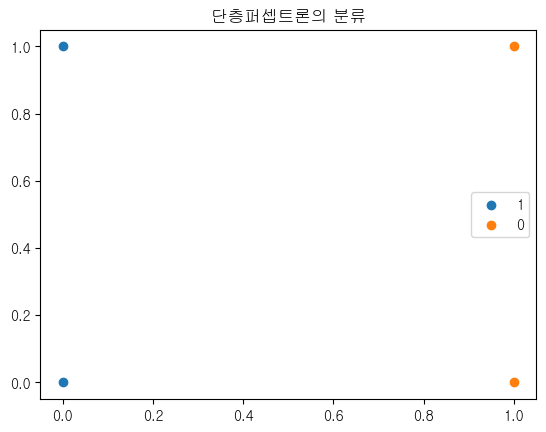

In [41]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.scatter([0,0],[0,1], label = '1')
plt.scatter([1,1],[0,1], label = '0')
plt.title("단층퍼셉트론의 분류")
plt.legend(loc = 'best')
plt.show()

# 다층 퍼셉트론

In [17]:
import torch
import pandas as pd
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [30]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:,0].values
        self.x2 = df.iloc[:,1].values
        self.y = df.iloc[:,2].values
        self.length = len(df)
        
    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y
    
    def __len__(self):
        return self.length

class Multi_Layer_Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(2,2),
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

In [31]:
train_dataset = CustomDataset('./perceptron.csv')
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True, drop_last = True)

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Multi_Layer_Perceptron().to(device)
criterion = nn.BCELoss().to(device)
# 책에서는 SGD로 10000epoch를 돌리지만,
# 학습이 잘안됨 + Adam은 100 epoch면 충분함 
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [33]:
checkpoint = 1
for epoch in range(100):
    cost = 0.0
    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        output = model(x)
        loss = criterion(output,y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss
    cost = cost / len(train_dataloader)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")
        torch.save({
            "model" : "Multi_Layer_Perceptron",
            "epoch" : epoch,
            "model_state_dict" : model.state_dict(),
            "optimizer_state_dict" : optimizer.state_dict(),
            "cost" : cost,
            "description" : f"Multi_Layer_Perceptron 체크포인트 - {checkpoint}",
        },
        f"./multi_layer_perceptron/multi_layer_perceptron_checkpoint-{checkpoint}.pt")
        checkpoint += 1

C:\Users\user\AppData\Local\Temp\ipykernel_67372\1959972745.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
C:\Users\user\AppData\Local\Temp\ipykernel_67372\1959972745.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch :   10, Cost : 0.671
Epoch :   20, Cost : 0.544
Epoch :   30, Cost : 0.402
Epoch :   40, Cost : 0.245
Epoch :   50, Cost : 0.143
Epoch :   60, Cost : 0.090
Epoch :   70, Cost : 0.062
Epoch :   80, Cost : 0.046
Epoch :   90, Cost : 0.035
Epoch :  100, Cost : 0.028


In [34]:
# checkpoint = torch.load('./multi_layer_perceptron/multi_layer_perceptron_checkpoint-9.pt')
# model = Multi_Layer_Perceptron().to(device)
# model.load_state_dict(checkpoint['model_state_dict'])
print(model)

Multi_Layer_Perceptron(
  (layer1): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (layer2): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [35]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
Multi_Layer_Perceptron                   --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       6
│    └─Sigmoid: 2-2                      --
├─Sequential: 1-2                        --
│    └─Linear: 2-3                       3
│    └─Sigmoid: 2-4                      --
Total params: 9
Trainable params: 9
Non-trainable params: 0

In [36]:
from torchsummary import summary
summary(model, (1,2), 64)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [64, 1, 2]               6
           Sigmoid-2                 [64, 1, 2]               0
            Linear-3                 [64, 1, 1]               3
           Sigmoid-4                 [64, 1, 1]               0
Total params: 9
Trainable params: 9
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [37]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor([
        [0,0],
        [0,1],
        [1,0],
        [1,1]
    ]).to(device)
    outputs = model(inputs)
    
    print("--------")
    print(outputs)
    print(outputs <= 0.5)

--------
tensor([[0.0143],
        [0.9770],
        [0.9768],
        [0.0500]], device='cuda:0')
tensor([[ True],
        [False],
        [False],
        [ True]], device='cuda:0')


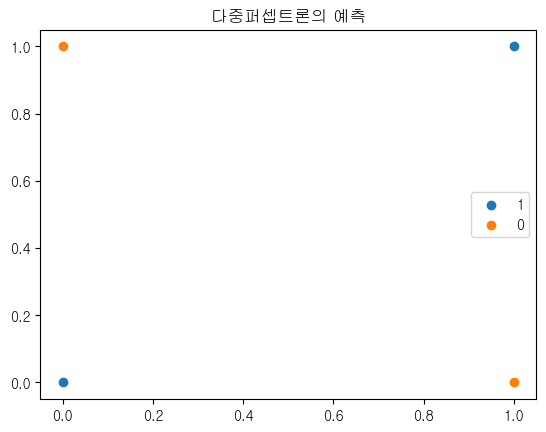

In [40]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.scatter([0,1],[0,1], label = '1')
plt.scatter([0,1],[1,0], label = '0')
plt.title("다중퍼셉트론의 예측")
plt.legend(loc = 'best')
plt.show()

* torchviz

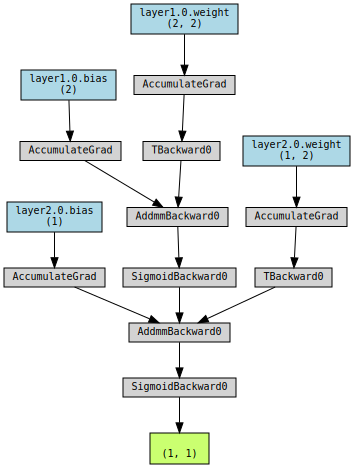

In [8]:
from torchviz import make_dot
x = torch.zeros(1,2).to(device)
make_dot(model(x), params = dict(list(model.named_parameters())))

In [9]:
import graphviz

# 간단한 그래프 생성
dot = graphviz.Digraph(comment='The Test Graph')
dot.node('A', 'Node A')
dot.node('B', 'Node B')
dot.edge('A', 'B', 'Edge A->B')

# 그래프를 이미지 파일로 저장 (예: PNG)
dot.render('test-graph', format='png', cleanup=True)

print("Graphviz 작동 확인이 완료되었습니다. 이미지 파일이 생성되었습니다.")

Graphviz 작동 확인이 완료되었습니다. 이미지 파일이 생성되었습니다.


# END(2023-12-22)